# **Theory**
---

## **Question 1**
*Suppose you have an MLP composed of an input of size 10, followed by one hidden layer with output of size 50, and finally one output layer with 3 output neurons. All artificial neurons use the ReLU activation function. The batch size used is.*

---
### a. What is the shape of the input $ X $?
The input $ X $ is a batch of size $ m $ with 10 features per sample. Therefore, its shape is:
$ X \in \mathbb{R}^{m \times 10} $

---

### b. What about the shape of the hidden layer's weight vector $ W_h $, and the shape of its bias vector $ b_h $?
- $ W_h $: This weight matrix maps the 10 input features to 50 hidden layer neurons. Its shape is:
$ W_h \in \mathbb{R}^{10 \times 50} $
- $ b_h $: This bias vector is added to the 50 neurons in the hidden layer. Its shape is:
$ b_h \in \mathbb{R}^{50} $

---

### c. What is the shape of the output layer's weight vector $ W_o $, and its bias vector $ b_o $?
- $ W_o $: This weight matrix maps the 50 hidden neurons to 3 output neurons. Its shape is:
$ W_o \in \mathbb{R}^{50 \times 3} $
- $ b_o $: This bias vector is added to the 3 output neurons. Its shape is:
$ b_o \in \mathbb{R}^{3} $

---

### d. What is the shape of the network's output matrix $ Y $?
The output matrix $ Y $ contains the predictions for $ m $ samples, each with 3 output values. Its shape is:
$ Y \in \mathbb{R}^{m \times 3} $

---

### e. Write the equation that computes the network's output matrix $ Y $ as a function of $ X, W_h, b_h, W_o, $ and $ b_o $.
The computation of the output $ Y $ involves the following steps:
1. Compute the pre-activation for the hidden layer:
   $ Z_h = X W_h + b_h $

2. Apply the ReLU activation function:
   $ H = \text{ReLU}(Z_h) = \max(0, Z_h) $

3. Compute the pre-activation for the output layer:
   $ Z_o = H W_o + b_o $

4. (Optional) Apply a non-linear activation to $ Z_o $, if specified, such as softmax for classification.

In an MLP, the right thing to do for the output layer depends on the specific task we are solving, diffrent task requires a diffrent activation function.
Therefore, we will write a general form:

$$ Y = Φ(\text{ReLU}(X W_h + b_h) W_o + b_o) $$

Where $ Φ $ is the activation function of the output layer

---

## **Question 2**
*Consider a CNN composed of three convolutional layers, each with $\ 3 × 3$
kernels, a stride of $\ 2 $, and SAME padding. The lowest layer outputs $\ 100 $ feature maps, the middle one outputs $\ 200 $, and the top one outputs $\ 400 $. The input images are RGB images of $\ 200 × 300$ pixels. What is the total number of parameters in the CNN? Explain your answer.*

---

Each convolution layer has its own feature maps, with each feature map holding parameters equal to the size of the feature map multiplied by the number of input channels. Each convolution layer's output has channels corresponding to the number of feature maps in the layer, which then functions as a multi-channel input for the next layer. After a convolution operation with a feature map, we have an additional parameter for bias.

For the first layer, the input is an RGB image (each index has 3 entries), so the number of parameters per feature map of size $3 \times 3$ is:

$$
\text{Layer 1}: \text{Feature maps} \cdot (3 \cdot 3 \cdot \text{Channels} + 1) = 100 \cdot (3 \cdot 3 \cdot 3 + 1)
$$

Now we'll calculate the number of parameters in each convolution layer and sum them up:

$$
\text{Layer 2}: 200 \cdot (3 \cdot 3 \cdot 100 + 1)
$$

$$
\text{Layer 3}: 400 \cdot (3 \cdot 3 \cdot 200 + 1)
$$

$$
⇒\text{Total of } 903,400 \text{ parameters}
$$

- The parameters of a CNN comes from the feature maps and bias only!

---


# Question 3
*In this question, we shall derive the gradient for a batch normalization layer. The algorithm of Batch Normalization, as taken directly from the original paper by Sergey Ioffe and Christian Szegedy*

$\textbf{Input:}$ Values of $x$ over a mini-batch: $\mathcal{B} = \{x_1, \dots, x_m\}$; \\
Parameters to be learned: $\gamma, \beta$ \\
$\textbf{Output:}$ $\{y_i = \text{BN}_{\gamma, \beta}(x_i)\}$

\begin{align*}
(1) \mu_{\mathcal{B}} &\leftarrow \frac{1}{m} \sum_{i=1}  {m} x_i && \text{// mini-batch mean} \\
(2) \sigma_{\mathcal{B}}^2 &\leftarrow \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_{\mathcal{B}})^2 && \text{// mini-batch variance} \\
(3) \hat{x}_i &\leftarrow \frac{x_i - \mu_{\mathcal{B}}}{\sqrt{\sigma_{\mathcal{B}}^2 + \epsilon}} && \text{// normalize} \\
(4) y_i &\leftarrow \gamma \hat{x}_i + \beta \equiv \text{BN}_{\gamma, \beta}(x_i) && \text{// scale and shift}
\end{align*}

---
a. $\frac{\partial f}{\partial γ} = \sum_{i=1}^{m} \frac{\partial f}{\partial y_i} \cdot \frac{\partial y_i}{\partial γ} \underset{(4)}{=} \sum_{i=1}^{m}\frac{\partial f}{\partial y_i}⋅\hat{x}_i$

b. $\frac{∂ f}{∂ β} = \sum_{i=1}^{m} \frac{∂ f}{∂ y_i}⋅\frac{∂ y_i}{∂ β} \underset{(4)}{=} \sum_{i=1}^{m} \frac{∂ f}{∂ y_i}⋅\frac{∂ (γ\hat{x}_i+β)}{∂β} \underset{\frac{∂ (γ\hat{x}_i+β)}{∂β}=1}{=} \sum_{i=1}^{m} \frac{∂ f}{∂ y_i} $

c. $\frac{∂ f}{∂\hat{x_i}} = \frac{∂ f}{∂ y_i}⋅\frac{∂ y_i}{∂\hat{x_i}}\underset{(4)}{=} \frac{∂ f}{∂ y_i}⋅γ$

d. $\frac{∂ f}{∂ \sigma^2} =\sum_{i=1}^{m}\frac{∂ f}{∂ \hat{x}_i}⋅\frac{∂ \hat{x}_i}{∂ σ^2} \underset{Derive (3)}{=} -\sum_{i=1}^{m}\frac{∂ f}{∂ \hat{x}_i}⋅ \frac{x_i-μ}{2(σ^2+ϵ)^\frac{3}{2}} \underset{(c)}{=} -\sum_{i=1}^{m}\frac{∂ f}{∂ y_i}⋅γ⋅ \frac{x_i-μ}{2(σ^2+ϵ)^\frac{3}{2}} $

e. $\frac{∂ f}{∂ μ} \underset{(2),(3)}{=}\sum_{i=1}^{m} \frac{∂ f}{∂ \hat{x}_i}⋅\frac{∂ \hat{x}_i}{∂ μ} + \frac{∂ f}{∂ σ^2}⋅\frac{∂ σ^2}{∂ μ} \underset{\text{(c), derive }(3)}{=}-\sum_{i=1}^{m}\frac{∂ f}{∂ y_i}⋅\frac{γ}{\sqrt{σ^2+ϵ}}$

f. $\frac{∂ f}{∂x_i} = \frac{∂ f}{∂ \hat{x}_i}⋅\frac{∂ \hat{x}_i}{∂ x_i}+\frac{∂ f}{∂ μ}⋅\frac{∂ \mu}{∂ x_i}+\frac{∂ f}{∂ \sigma^2}⋅\frac{∂ σ^2}{∂ x_i} \underset{\text{(c), (e), (d) derive }(3)}{=} \frac{γ}{\sqrt{σ^2+ϵ}}⋅\frac{∂ f}{∂ y_i}-\frac{∂ \mu}{∂ x_i}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅\frac{γ}{\sqrt{σ^2+ϵ}}-\frac{∂ σ^2}{∂ x_i}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅γ⋅ \frac{x_j-μ}{2(σ^2+ϵ)^\frac{3}{2}} \underset{\text{Derive (1), Derive (2)}}{=} \frac{γ}{\sqrt{σ^2+ϵ}}⋅\frac{∂ f}{∂ y_i}-\frac{1}{m}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅\frac{γ}{\sqrt{σ^2+ϵ}}-\frac{2(x_j-μ)}{m}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅γ⋅ \frac{x_j-μ}{2(σ^2+ϵ)^\frac{3}{2}}$

# **Practical results summary**

## *Question 4 - Results*
Implement the Lenet5 network over the FashionMNIST data set.

Compare the usage of the following techniques with Lenet5:

* Dropout (at the hidden layer)

* Weight Decay (also known as l2 loss)

* Batch Normalization

  **a**. A convergence graph is a graph with epochs as x-axis, and
accuracy as y-axis. Provide a convergence graph for each of the
three techniques – and for each of them plot one graph for the
accuracy on the train data and one for the test. In addition, plot one
graph without regularization (8 graphs in total).

  **b**. Note: For dropout, the train accuracy must be measured without
dropout.

  **c**. Provide a table, which summarizes all 8 final accuracies.

  **d**. Make Conclusions regarding the results.

Comments:

* Describe in the readme file how to train each setting, and how to test it
with the saved weights.

* All graphs should be clear with a proper heading. It is highly
recommended (but not mandatory) to plot the train and test graphs for
each technique together in the same plot (only 4 plots in total).

* For dropout, the train accuracy must be measured without dropout.

* The leaning rate, and optimizer are up to your choice. Despite that, if
you do not achieve at least 88% test accuracy – you're doing something
wrong! (much more can be achieved).
---

The architecture of the LeNet 5 we implemented:
Based on the network studied in class, a classic neural network architecture for image classification.

***The architecture:***

*Layers*
1. *Convolutional layer* -   `1 input channel`, `6 output channels`, a `kernel size` of 5, and `padding` of 2.
Followed by `ReLU activation` and `average pooling` with a kernel size of 2 and stride of 2.

2. *Convolutional layer* -  6 input channels (amount of output channels from the previous layer), 16 output channels, a kernel
size of 5. Followed by ReLU activation and average pooling with a kernel size of 2 and stride of 2.

3. *Fully connected layer* -   5 * 5 * 16 input features and 120 output features. Followed by ReLU
activation.

4. *Fully connected layer* -  120 input features and 84 output features. Followed by ReLU
activation.

5. *Fully connected layer*  -  84 input features and 10 output features.

*Regularization types*

1. Dropout is applied after the first fully connected layer and after the second fully connected layer.

2. Batch Normalization is applied after each Convolutional layer.

3. Initialization of the model with weight decay.


***Hyperparameters***


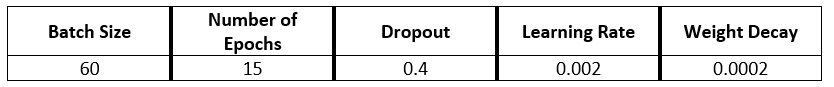

***Results***

*Final*


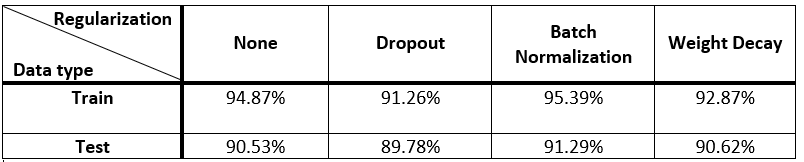


*Best*


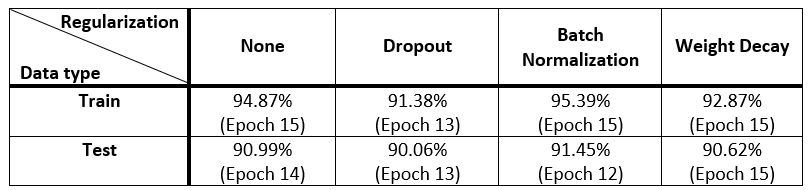

*Graphs*

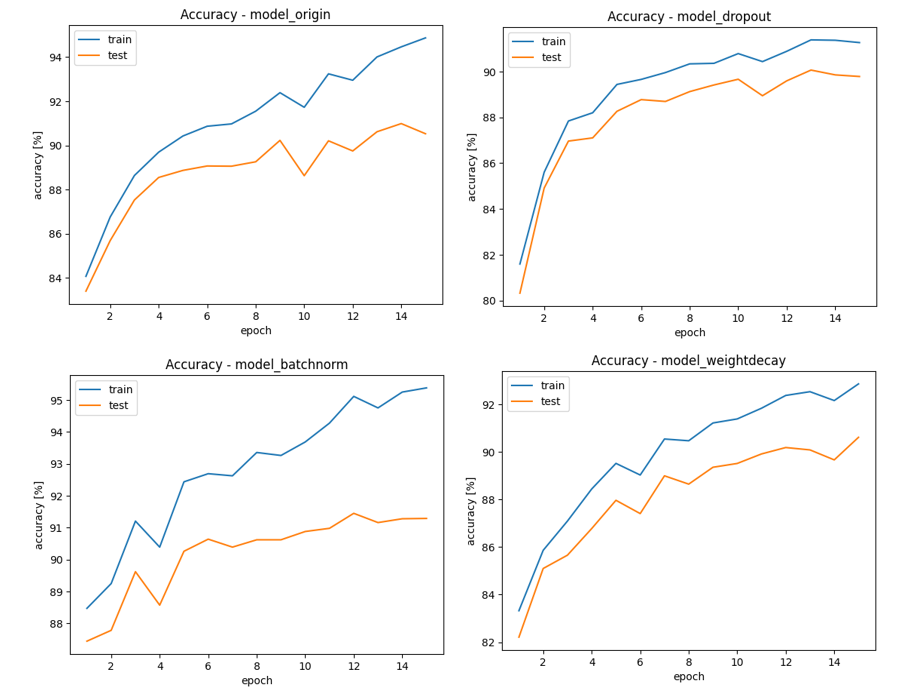

***Conclusions***



*	While Dropout is typically expected to help address overfitting and improve model generalization, we observe a slight reduction in training accuracy without a corresponding improvement in test accuracy. It does, however, narrow the gap between training and test accuracies, but not beyond that.

*	By achieving the highest test accuracy in this occasion, Batch normalization emerges as the most effective regularization technique. It addresses internal covariate shift and speeds up convergence during training.

*	Weight decay provides a small improvement in test accuracy, indicating that it helps control the model's complexity and contributes to better generalization.


* As demonstrated above, no single regularization technique universally improves accuracy. Its effectiveness depends on the scenario, including the dataset and the target task.
